# Spanning tree as a matroid

For weighted undirected graph $G=(V, E)$ with no loops and no parallel edges 
with defined $w(e)$ for $e \in E$:

- Let E be a ground set
- Let a set of all possible forests in $G$ be $I$ (independent sets). In other words, 'independent' = 'acyclic subgraph'.
  - $\emptyset$ is acyclic
  - Any subset of forest (acyclic graph) is a forest
  - If for a forest A there is a bigger forest B:
    - A⊂B ⇒ take any $x$ from B\A
    - A⊄B ⇒ there is as least one edge with a vertex $e$ not present in A. Attach it.
    
## TODO: implement a [greedy algorithm for a spanning tree](https://en.wikipedia.org/wiki/Kruskal%27s_algorithm) case

In [7]:
import numpy as np
import networkx as nx

G = nx.Graph()

def independent(G):
    try:
        nx.find_cycle(G)
        return False
    except:
        return True

print(independent(G))
G.add_weighted_edges_from([("a", "b", 3), ("b", "c", 2)])
print(independent(G))
G.add_weighted_edges_from([("a", "c", 4)])
print(independent(G))

True
True
False


24


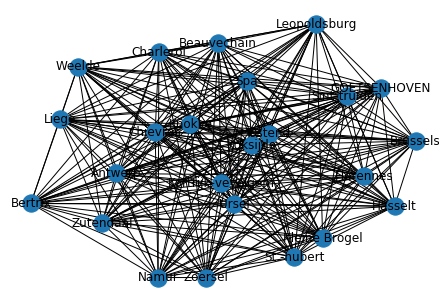

In [21]:
from itertools import product
import csv, math
import matplotlib.pyplot as plt
G = nx.Graph()

def distance(p1, p2):
    R = 6373.0
    lat1, lat2 = math.radians(p1[0]), math.radians(p2[0])
    lon1, lon2 = math.radians(p1[0]), math.radians(p2[0])

    dlon = lon1 - lon2
    dlat = lat1 - lat2
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

def get_airports(country):
    with open('data/airports.dat.csv', 'r', encoding='utf-8') as f:
        reader = csv.reader(f)
        for row in reader:
            city = row[2]
            country_ = row[3]
            lat = float(row[7])
            lon = float(row[6])
            if country == country_:
                yield city, (lat, lon)
                
A = dict(get_airports("Belgium"))
print(len(A))
for a, b in product(list(A.keys()), list(A.keys())):
    if a != b:
        G.add_weighted_edges_from([(a, b, distance(A[a], A[b]))])

nx.draw(G, with_labels=True)
plt.show()

(0.09263286487294346, ('Beauvechain', 'Namur'))


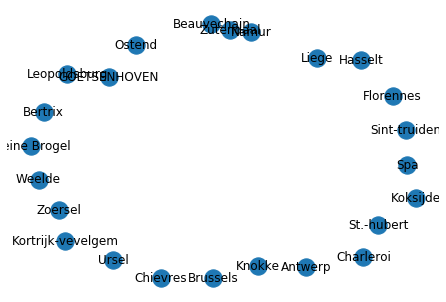

In [48]:
def greedy_spannning_tree(G):
    M = nx.Graph()
    M.add_nodes_from(list(G.nodes))
    E = sorted([(G.get_edge_data(*e)['weight'], e) for e in G.edges])
    e = E[0]
    print(e)
    M.add_weighted_edges_from([(*e[1], e[0])])
    # TODO: complete the algorithm
    
    return M
    
ST = greedy_spannning_tree(G)
nx.draw(ST, with_labels=True)
plt.show()

# Other greedy things
- [Huffman coding](https://en.wikipedia.org/wiki/Huffman_coding)
- [Greedy rank estimation](https://en.wikipedia.org/wiki/Row_echelon_form)
- [Interval scheduling](https://en.wikipedia.org/wiki/Interval_scheduling#Interval_Scheduling_Maximization)

# [Greedy when non-optimal](https://en.wikipedia.org/wiki/Nearest_neighbour_algorithm)

The **nearest neighbour algorithm** was one of the first algorithms used to solve the travelling salesman problem approximately. In that problem, the salesman starts at a random city and repeatedly visits the nearest city until all have been visited. The algorithm quickly yields a short tour, but usually not the optimal one.

These are the steps of the algorithm:

1. Initialize all vertices as unvisited.
2. Select an arbitrary vertex, set it as the current vertex `u`. Mark `u` as visited.
3. Find out the shortest edge connecting the current vertex `u` and an unvisited vertex `v`.
4. Set `v` as the current vertex `u`. Mark `v` as visited.
5. If all the vertices in the domain are visited, then terminate. Else, go to step 3.

# TODO implement greedy greedy strategy for travelling salesman

In [65]:
import random
A = dict(get_airports('Serbia'))
airports = list(A.keys())

def build_dist_matrix(airports, A):
    M = np.zeros((len(airports), len(airports)))
    for a, b in product(range(M.shape[0]), range(M.shape[1])):
        M[a, b] = distance(A[airports[a]], A[airports[b]])
    return M

M = build_dist_matrix(airports, A)

def cycle_length(path, A):
    p = list(path)
    p += [p[0]]
    d = 0
    for i in range(1, len(p)):
        d += distance(A[p[i-1]], A[p[i]])
    return d
        
def greedy_salesman(A):
    airports = list(A.keys())
    start = airports[random.randint(0, len(airports)-1)]
    print(start)
    M = build_dist_matrix(airports, A)
    
    # ...
    
    return list(A.keys())

Vrsac
['Belgrade', 'Nis', 'Pristina', 'Vrsac', 'Batajnica', 'Novi Sad']
696.7364332946423


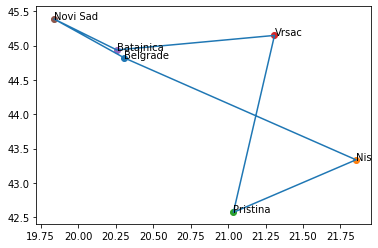

In [67]:
path = greedy_salesman(A)
print(path)
print(cycle_length(path, A))

for txt in airports:
    plt.scatter(*A[txt])
    plt.annotate(txt, A[txt])

chain = np.matrix([A[airport] for airport in path + [path[0]]])    
plt.plot(chain[:, 0], chain[:, 1])
plt.show()